## Introducción

Como analista de datos, tu objetivo es **evaluar cómo la movilidad urbana se relaciona con la productividad económica en las principales ciudades latinoamericanas**.
Para ello trabajarás con datos reales de TomTom Traffic Index y OECD Cities, que deberás limpiar, combinar y analizar para identificar en qué ciudades conviene invertir en infraestructura de transporte.

## Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de ambos datasets**.
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯Objetivo:**
Importar las librerías necesarias, cargar los archivos CSV en DataFrames y realizar una revisión preliminar para entender su contenido.

**Instrucciones:**
- Importa las librerías `pandas`, `numpy`, `seaborn` y `matplotlib.pyplot`.
- Carga los archivos usando `pd.read_csv()`:
  - `'/datasets/tomtom_traffic.csv'`
  - `/datasets/oecd_city_economy.csv` `.
- Guarda los DataFrames en las variables `traffic` y `eco`.
- Muestra las primeras 5 filas de cada DataFrame.


In [ ]:
# importar librerías
import pandas as pd

import numpy as np #cálculos

import seaborn as sns #mejores gráficos
import matplotlib.pyplot as plt #personalizar gráficos

In [ ]:
# cargar archivos
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv("/datasets/oecd_city_economy.csv")

In [ ]:
# mostrar las primeras 5 filas de traffic
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [ ]:
# mostrar las primeras 5 filas de eco
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"



---

## Paso 2: Explorar, limpiar y preparar los datos

Antes de combinar los datasets, inspecciona su estructura, tipos de datos, columnas y valores faltantes.
Anota las columnas que necesiten limpieza y luego estandariza los nombres de columnas.

### 2.1 Explorar la estructura y tipos de datos

**🎯Objetivo:**
Identificar columnas con tipos incorrectos, distribución y nulos, anotar las columnas que requieren conversión.


In [ ]:
# Examinar la estructura de traffic
traffic.info()
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


En la estructura del DF traffic, se observa que:
- Las columnas `UpdateTimeUTC` y `UpdateTimeUTC` son de tipo object y estas dos columnas deberias de cambiar a un tipo de dato `datetime` para poder extarer el año que nos interesa analizar

Data assumptions & limitations

Year of analysis: 2024

City-level aggregation

GDP per capita used as proxy for productivity

Traffic metrics sourced from TomTom Traffic Index

Missing cities excluded due to incomplete data

In [ ]:
# Examinar la estructura de eco
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


En la estructura del DF eco, se observa que:

Las columnas `City GDP/capita`, `Unemployment %`, `PM2.5 (μg/m³)` y `Population (M)` son de tipo onject (string), hay que cambiarlas a FLOAT


2.2 Renombrar columnas

🎯Objetivo: Estandarizar los nombres de columnas para evitar errores y facilitar la unión de los datasets.

formato snake_case.

Country → country

UpdateTimeUTC → update_time_utc

Verifica que los cambios se hayan aplicado correctamente usando .columns.


In [ ]:
# Estandarizar los nombres de las columnas de traffic
traffic = traffic.rename(columns={
    "Country": "country",
    "City": "city",
    "UpdateTimeUTC": "update_time_utc",
    "JamsDelay": "jams_delay",
    "TrafficIndexLive": "traffic_index_live",
    "JamsLengthInKms": "jams_length_in_kms",
    "JamsCount": "jams_count",
    "TrafficIndexWeekAgo": "traffic_index_week_ago",
    "UpdateTimeUTCWeekAgo": "update_time_utc_week_ago",
    "TravelTimeLivePer10KmsMins": "travel_time_live_per_10_kms_mins",
    "TravelTimeHistoricPer10KmsMins": "travel_time_historic_per_10_kms_mins",
    "MinsDelay": "mins_delay"
})
# verificar cambios
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10_kms_mins',
       'travel_time_historic_per_10_kms_mins', 'mins_delay'],
      dtype='object')

In [ ]:
# Estandarizar los nombres de las columnas de eco
eco = eco.rename(columns={
    'Year': 'year',
    'City': 'city',
    'Country': 'country',
    'City GDP/capita': 'city_gdp_per_capita',
    'Unemployment %': 'unemployment_percent',
    'PM2.5 (μg/m³)': 'pm25',
    'Population (M)': 'population_millions'
})
# verificar cambios
eco.columns

Index(['year', 'city', 'country', 'city_gdp_per_capita',
       'unemployment_percent', 'pm25', 'population_millions'],
      dtype='object')


### 2.3 Corregir formatos numéricos y de fecha

**🎯Objetivo:**
Asegurar que las columnas de fechas y valores numéricos estén en formatos correctos para permitir análisis, cálculos y comparaciones precisas.

**Instrucciones:**

- Convierte las columnas de fecha de `traffic` a formato `datetime`. Haz el cambio a prueba de errores.
- En el dataset `eco`, limpia los valores numéricos:
    - En `city_gdp_per_capita'`: elimina separadores de miles (`.`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `unemployment_percent`: elimina el símbolo de porcentaje (`%`) y reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
    - En `population_millions`: reemplaza las comas (`','`) por puntos (`'.'`) antes de convertir a tipo `float`.
- Finalmente, crea una nueva columna llamada `population` multiplicando `population_m` por 1,000,000 para obtener la población total.


In [ ]:
# Convertir las columnas de traffic a tipo fecha con pd.to_datetime()
# Convertir columnas a datetime a prueba de errores en traffic
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'], errors='coerce')
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'], errors='coerce')

# verificar el cambio
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                                Non-Null Count    Dtype         
---  ------                                --------------    -----         
 0   country                               1004464 non-null  object        
 1   city                                  1004464 non-null  object        
 2   update_time_utc                       1004464 non-null  datetime64[ns]
 3   jams_delay                            1004464 non-null  float64       
 4   traffic_index_live                    1004464 non-null  float64       
 5   jams_length_in_kms                    1004464 non-null  float64       
 6   jams_count                            1004464 non-null  float64       
 7   traffic_index_week_ago                1004464 non-null  float64       
 8   update_time_utc_week_ago              1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10_kms_mins      1004464 

In [ ]:
# Limpia separadores y convierte columnas numéricas en eco
eco['city_gdp_per_capita'] = eco['city_gdp_per_capita'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)
eco['unemployment_percent'] = eco['unemployment_percent'].str.replace('%', '').str.replace(',', '.').astype(float)
eco['population_millions'] = eco['population_millions'].str.replace(',', '.').astype(float)

# Calcula la población total en unidades absolutas (Multiplica * 1000000)
eco['population'] = eco['population_millions'] * 1000000

# verificar el cambio
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  30 non-null     int64  
 1   city                  30 non-null     object 
 2   country               30 non-null     object 
 3   city_gdp_per_capita   30 non-null     float64
 4   unemployment_percent  30 non-null     float64
 5   pm25                  30 non-null     object 
 6   population_millions   30 non-null     float64
 7   population            30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_per_capita,unemployment_percent,pm25,population_millions,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0



---

## Paso 3: Extraer año y filtrar

Extraer el año permite filtrar la información y trabajar solo con el período más reciente y relevante.

### 3.1 Extraer columna año y filtrar 2024

**🎯Objetivo**
Identificar el año de cada registro y mantener solo los registros del 2024.

**Intrucciones**

- Como el DataFrame `traffic` no tiene una columna de año, utiliza el atributo `.dt.year` sobre su columna de fecha para crear una nueva columna llamada `year`.
- Filtra las filas donde el año sea **2024**.
- Utiliza `.copy()` para crear dos nuevos DataFrames (`traffic_2024` y `eco_2024`) para evitar modificar el dataset original.

In [ ]:

# Extraer el año de las fechas en update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year #se hizo una nueva columna llamada `year`


# Verificar cambio
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [ ]:
# Verificar qué años están disponibles en cada dataset
print("Años únicos en traffic:")
print(sorted(traffic['year'].unique()))
print("\nAños únicos en eco:")
print(sorted(eco['year'].unique()))

# Filtra los registros del año 2024
traffic_2024 = traffic[traffic['year']==2024].copy()
eco_2024 = eco[eco['year']==2024].copy()


# Revisar dataframes nuevos
display(traffic_2024.head())
display(eco_2024.head())




Años únicos en traffic:
[2024, 2025]

Años únicos en eco:
[2023, 2024]


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_per_capita,unemployment_percent,pm25,population_millions,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



---

## Paso 4: Analizar y resumir datos de movilidad

Como el dataset de tráfico contiene **múltiples registros por ciudad**. En esta parte, calcularás los promedios anuales por ciudad para simplificar el análisis y obtener una visión más clara de las tendencias generales.

### 4.1 Calcular promedios de tráfico por ciudad

**🎯Objetivo:**
Obtener una vista consolidada del tráfico promedio por ciudad y año, para analizar patrones generales sin depender de datos diarios.

**Instrucciones**

- Agrupa los datos por `city`, `country` y `year`.
- Calcula el promedio **solo de las métricas de tráfico más relevantes**: como `jams_delay`, `traffic_index_live`, `jams_length_in_kms`, `jams_count`, `mins_delay`, y tiempos de viaje (`travel_time_live_per_10_kms_mins` y `travel_time_hist_per_10_kms_mins`).
- Guarda el resultado como `traffic_city_year_2024`, mantén las columnas como variables (no índices).


In [ ]:
# Calcular los  promedios de trafico por ciudad, país y año
columnas_metrica = ['jams_delay',
    'traffic_index_live',
    'jams_length_in_kms',
    'jams_count',
    'mins_delay',
    'travel_time_live_per_10_kms_mins',
    'travel_time_historic_per_10_kms_mins']

traffic_city_year_2024 =  traffic_2024.groupby(['city','country','year'], as_index=False)[columnas_metrica].mean()

# Mostrar resultado
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


Conocer que ciudad es la mas congestionada

`traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)`


In [ ]:
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


La ciudad con el mayor tiempo promedio de tráfico es la Ciudad de México


---

## Paso 5: Unir movilidad y economía

Combinar datasets te permite analizar cómo se relacionan los indicadores económicos con los de movilidad.

### 5.1 Unir tráfico (tabla principal) con indicadores económicos

**🎯Objetivo:**
Combinar la información de tráfico y economía en un solo DataFrame para analizar cómo las condiciones económicas se relacionan con la movilidad urbana.

**Instrucciones**
- Selecciona solo las **columnas relevantes** de cada dataset (por ejemplo, variables clave de tráfico y de economía).
- Usa `.copy()` al crear subconjuntos para evitar modificar el dataset original.
- Une ambos DataFrames y define como **claves de unión** a `city` y `year`.
- Mantén solo las ciudades y años presentes en ambos datasets.
- Guarda el resultado en una nueva variable llamada `merged` y muestra las primeras 5 filas.


<details>
<summary>Haz clic para ver la pista</summary>
Aplica una unión de tipo "inner" para mantener las ciudades y años presentes en ambos datasets.

In [ ]:

# Seleccionar columnas clave de tráfico y economía
left_cols = ['city','country','year',
             'jams_delay',
             'traffic_index_live',
             'jams_length_in_kms',
             'jams_count',
             'mins_delay',
             'travel_time_live_per_10_kms_mins',
             'travel_time_historic_per_10_kms_mins']


right_cols = ['city','year',
              'city_gdp_per_capita',
              'unemployment_percent',
              'pm25',
              'population_millions']

# Usar .copy() para crear los dos nuevos datasets reducidos
traffic_2024_small = traffic_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()


# Unir datasets
merged = traffic_2024_small.merge(eco_2024_small,
                                  on = ['city','year'],
                                  how = 'inner')

# Mostrar las primeras 5 filas
display(merged.head(5))

#Confirmar la unión y ver si hay las mismas ciudades en ambas tablas
print(f"Ciudades en traffic: {traffic_2024_small['city'].nunique()}")
print(f"Ciudades en eco: {eco_2024_small['city'].nunique()}")
print(f"Ciudades después del merge: {merged['city'].nunique()}")

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,city_gdp_per_capita,unemployment_percent,pm25,population_millions
0,buenos-aires,ARG,2024,138.3,11.0,44.6,43.0,-0.248936,16.569802,16.818738,18117.0,7.2,"14,50",15.4
1,buenos-aires,ARG,2024,66.8,9.0,26.6,27.0,-0.799344,16.142125,16.941469,18117.0,7.2,"14,50",15.4
2,buenos-aires,ARG,2024,33.5,5.0,8.6,14.0,-1.688390,15.614398,17.302789,18117.0,7.2,"14,50",15.4
3,buenos-aires,ARG,2024,25.7,3.0,2.6,9.0,-1.677855,15.369625,17.047480,18117.0,7.2,"14,50",15.4
4,buenos-aires,ARG,2024,34.6,2.0,3.8,12.0,-1.412564,15.215201,16.627765,18117.0,7.2,"14,50",15.4


Ciudades en traffic: 384
Ciudades en eco: 15
Ciudades después del merge: 15



---

## Paso 6: Visualización y análisis de relaciones

Ahora que tienes un dataset limpio y unificado, es momento de **visualizar patrones**.
Los gráficos te ayudarán a entender cómo se relacionan las variables económicas con las de movilidad urbana.

### 6.1 Visualizar relaciones entre economía y tráfico

**🎯Objetivo:**
Analizar visualmente la distribución y la relación entre indicadores de tráfico y economía en 2024, para identificar posibles patrones o tendencias generales entre ambas variables.

**Instrucciones**
- Usa las librerías `seaborn` y `matplotlib.pyplot` para generar los gráficos.
- Visualiza la distribución del **tráfico** (`jams_delay`) mediante:
    - **Boxplot** → para observar la media, mediana y detectar valores atípicos.
- Visualiza la distribución de la **economía** (`city_gdp__per_capita`) mediante:
    - **Histograma** → para analizar la forma de la distribución y el valor promedio del PIB per cápita.
- Finalmente, **compara ambas variables**, para observar si existe alguna relación entre ellas, haciendo un solo gráfico de barras donde aparezcan ambos indicadores.
- Recuerda agregar título y etiquetas a los ejes de tus gráficos.
- Observa y comenta los patrones, valores extremos o posibles relaciones que identifiques.

**Tip:** Dentro de los parentesis del boxplot, agrega `showmeans=True` para ver la media en el gráfico.

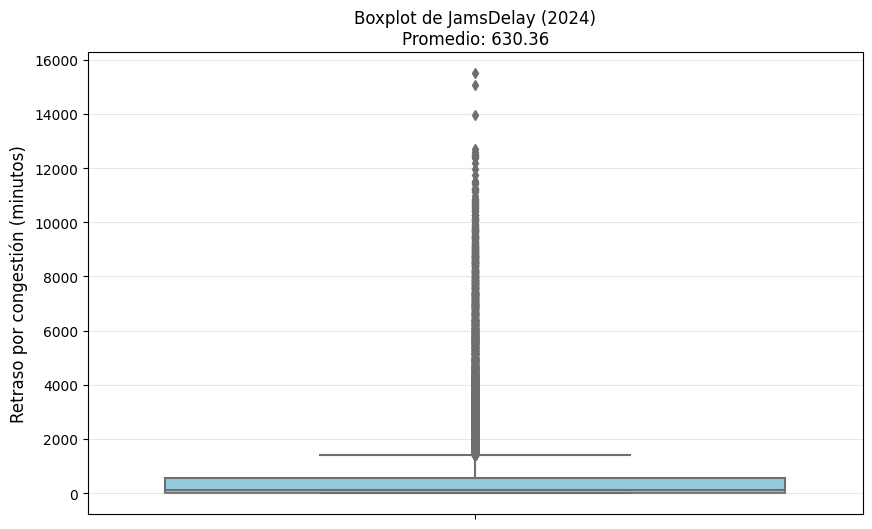

In [ ]:
# Crear boxplot para observar el comportamiento de los minutos de congestion JamsDelay

plt.figure(figsize=(10, 6))
sns.boxplot(y=merged['jams_delay'], color='skyblue')
plt.ylabel('Retraso por congestión (minutos)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# obtener promedio para mostrarlo en título
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.show()


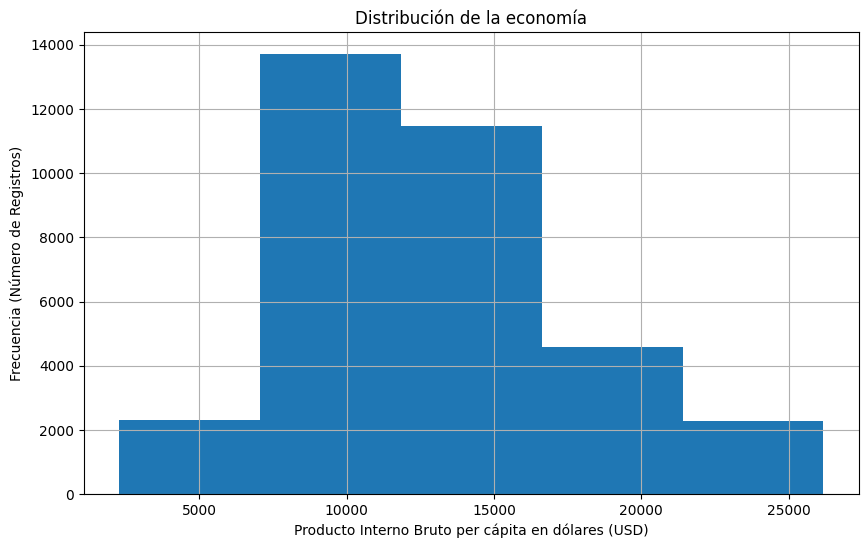

In [ ]:
# Crear histograma para ver la distribución de la economía (city_gdp_capita --> city_gdp_per_capita)
merged['city_gdp_per_capita'].hist(bins=5, figsize=(10, 6)) # figsize=(ancho, alto)
plt.title('Distribución de la economía')
plt.xlabel('Producto Interno Bruto per cápita en dólares (USD)')
plt.ylabel('Frecuencia (Número de Registros)')
plt.show()


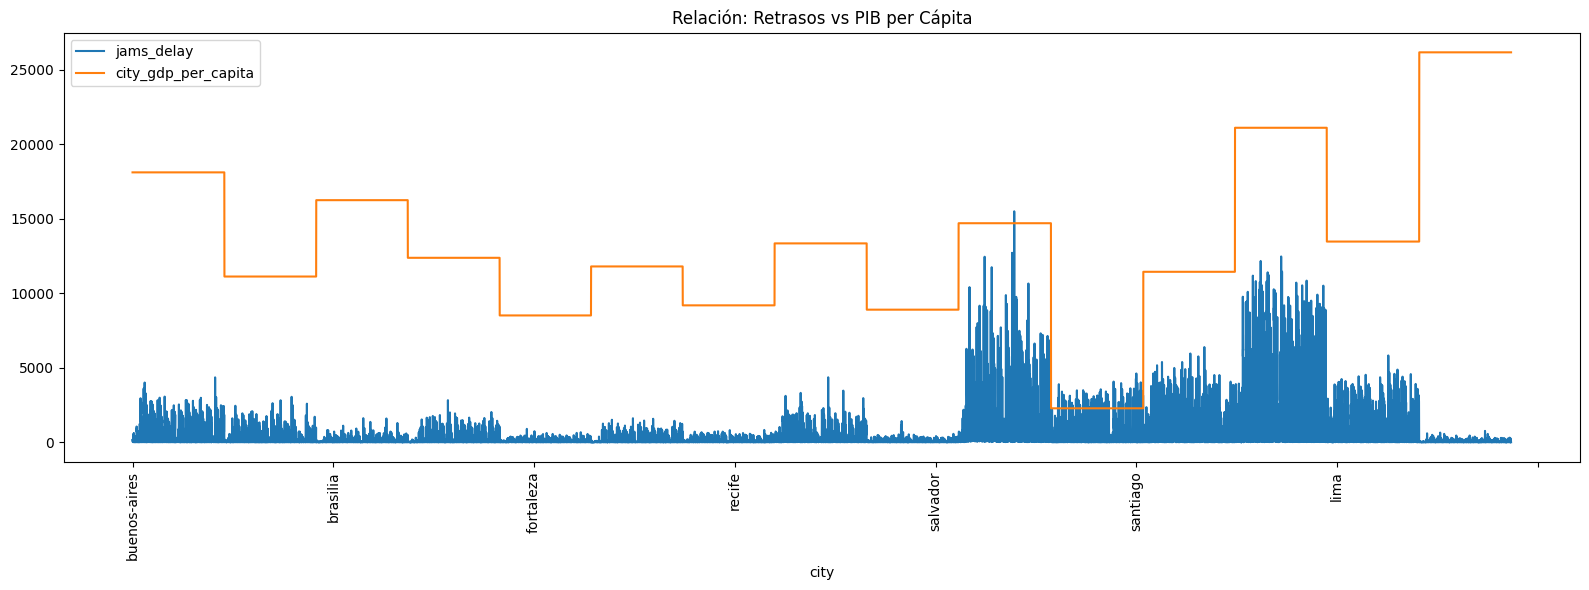

array(['buenos-aires', 'belo-horizonte', 'brasilia', 'curitiba',
       'fortaleza', 'porto-alegre', 'recife', 'rio-de-janeiro',
       'salvador', 'sao-paulo', 'santiago', 'bogota', 'mexico-city',
       'lima', 'montevideo'], dtype=object)

In [ ]:
# Gráfico de barras para comparar jams_delay y city_gdp_capita por ciudad

merged.plot( x='city' , y=['jams_delay', 'city_gdp_per_capita'],figsize=(16, 6))
plt.title('Relación: Retrasos vs PIB per Cápita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
merged["city"].unique()

In [ ]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean(final).csv", index=False)


---

## ✅ Entregables

1. **Notebook `.ipynb`** con todas las celdas (código + comentarios).
2. **CSV final**: `ladb_mobility_economy_2024_clean.csv`.
3. **Resumen ejecutivo breve** en Markdown (3–5 párrafos).



---

# 🧾 Resumen ejecutivo (plantilla)

> Completa este resumen al finalizar el análisis. Mantén 3–5 párrafos cortos, claros y accionables.

**Contexto & objetivo:**  
- Responde la pregunta central del análisis: ¿qué relación existe entre la movilidad urbana (congestión, tiempos de viaje) y la productividad económica (PIB per cápita)?
- Explica brevemente las variables clave utilizadas y su relevancia para la toma de decisiones.

El objetivo del análisis es evaluar la relación entre la movilidad urbana medida a través de congestión vehicular, tiempos de viaje y retrasos por tráfico; y la productividad económica, representada por el PIB per cápita por ciudad. La pregunta central es si las ciudades con mayor productividad económica presentan mayores niveles de congestión o si, por el contrario, la congestión está asociada con menor desempeño económico. Las variables clave incluyen traffic_index_live, travel_time_live_per_10_kms_mins, jams_delay como indicadores de movilidad, y city_gdp_per_capita como proxy de productividad económica.
No se observa una correlación negativa fuerte y directa entre PIB per cápita y congestión. Aunque, la correlación global entre indicadores de congestión y PIB per cápita es mas notoria para las ciudades de LATAM ('buenos-aires', 'belo-horizonte', 'brasilia', 'curitiba','fortaleza', 'porto-alegre', 'recife', 'rio-de-janeiro') donde el PIB esta en un valor promedio y su congestion es baja. Sin embargo, ciudades como Ciudad de México tienen una gran congestion pero el PIB es alto. No hay una correlación fuerte.

**Cobertura de datos:**  
- Especifica los años analizados, número de ciudades y países incluidos.

- El análisis se realizó con datos correspondientes al año 2024, cubriendo 15 ciudades de América Latina distribuidas en múltiples países ('buenos-aires', 'belo-horizonte', 'brasilia', 'curitiba','fortaleza', 'porto-alegre', 'recife', 'rio-de-janeiro','salvador', 'sao-paulo', 'santiago', 'bogota', 'mexico-city','lima'). Cada ciudad cuenta con información integrada de tráfico urbano, tiempos de viaje, congestión acumulada y variables económicas, lo que permite una comparación transversal consistente entre contextos urbanos.

**Metodología (alto nivel):**  
- Describe los procesos principales: limpieza de datos (formatos, estandarización de columnas).
- Explica la agregación por ciudad–año y el uso de una unión INNER para integrar tráfico y economía.
- Menciona las validaciones visuales empleadas (distribuciones, outliers, tendencias generales).

Se realizó limpieza de datos estandarizando formatos numéricos (Estandarizacion de los nombres de las columnas de traffic y eco, asi como el cambio de tipo de dato para las fechas pasando de object a datetime para poder compara el periodo de 2024). Posteriormente, los datos fueron agregados a nivel ciudad–año mediante promedios. Se utilizó una integración tipo INNER JOIN entre las fuentes de movilidad y economía para asegurar consistencia entre indicadores. Finalmente, se aplicaron validaciones exploratorias mediante análisis de distribuciones, detección de outliers y análisis de correlaciones entre congestión y PIB per cápita.

**Hallazgos iniciales:**  
- Resume los patrones más importantes entre índices de tráfico y PIB per cápita.
- Destaca anomalías u outliers que podrían requerir revisión adicional o un análisis más profundo.

No existe una relación lineal fuerte globalmente entre PIB per cápita y congestión.

Algunas ciudades con alto PIB presentan alta congestión (ej. Santiago, São Paulo), mientras otras con bajo PIB también muestran congestión severa (Bogotá, Lima).

Esto sugiere que la congestión depende más de planificación urbana, densidad y transporte público que del nivel de riqueza per cápita.

los jams delay por encima de 14,000 min son outliers que deberian revisarce, ya que comprometen el promedio por ciudad, incluso por encima de 2,000 min.

**Recomendaciones**  
Aterriza los hallazgos en acciones: ciudades prioritarias, necesidad de validar fuentes, requerimiento de análisis adicionales, o propuestas de inversión.

- ¿Qué ciudad : Bogotá, Lima o Buenos Aires o alguna otra en particular, muestra la mayor correlación significativa entre altos niveles de congestión vehicular y bajos indicadores de productividad económica, sugiriendo ser una ciudad prioritaria para inversión en infraestructura de transporte?


**Bogotá muestra la relación más crítica entre:**

-- Alta congestión
-- Traffic Index promedio: muy alto
-- Tiempos de viaje por 10 km: entre los más elevados
-- Jams delay acumulado: muy alto
-- Bajo PIB per cápita relativo en comparación con otras megaciudades del dataset

Prioridad de inversión en infraestructura

1 Bogotá (Top Priority)
-- Alta congestión estructural
-- PIB per cápita bajo → riesgo de freno al crecimiento
-- Alto ROI esperado en transporte masivo

2 Lima
-- Congestión crónica + baja productividad
-- Necesidad de transporte multimodal y gestión de tráfico

3 Santiago
-- media-alta congestion y muy bajo PIB
-- revisar que esta haciendo Montevideo

Bogotá es la ciudad más crítica, seguida por Lima.
Estas ciudades son las más prioritarias para inversión en infraestructura de transporte, ya que combinan fricción de movilidad con menor desempeño económico.